# Red Wine Quality Classifier

In [1]:
#import the red wine datasheet
import pandas as pd
data = pd.read_csv('/Users/zhichaoweng/Downloads/winequality-white.csv',sep = ';')

In [5]:
#make sure each data is numerical and there is no categorical data
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Looks like all the data are numerical.

To check how the label results are distributed statistically

In [18]:
data['quality'].value_counts()


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

(array([   20.,     0.,     0.,   163.,     0.,     0.,  1457.,     0.,
            0.,     0.,  2198.,     0.,     0.,   880.,     0.,     0.,
          175.,     0.,     0.,     5.]),
 array([ 3. ,  3.3,  3.6,  3.9,  4.2,  4.5,  4.8,  5.1,  5.4,  5.7,  6. ,
         6.3,  6.6,  6.9,  7.2,  7.5,  7.8,  8.1,  8.4,  8.7,  9. ]),
 <a list of 20 Patch objects>)

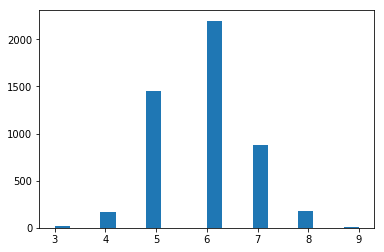

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data['quality'], bins = 20)

## Initial label selection

In [27]:
#initial label distribution. 
#initial rule: 3, 4: bad quality.  5, 6, 7: middle quality.  8, 9: good quality
#convert these three types (bad, middle and good qualities) into numerical data: 0 - bad quality. 1 - middle quality. 2 - good quality

y1 = data['quality']
y1.head()

#initial conversion to assign 0, 1, 2 to bad, middle and good quality
y = []
for i in y1:
    if i < 5: 
        y.append(0)
    elif 4 < i < 8:
        y.append(1)
    else:
        y.append(2)

#to check how the newly assigned label distributes
from collections import Counter
Counter(y)

Counter({0: 183, 1: 4535, 2: 180})

## Initial feature selection

In [28]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [33]:
Feature = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
Feature.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [34]:
Feature.isnull().sum() #check if there's any NaN in the dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

## Data preprocessing

In [35]:
X = Feature
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [37]:
y[:5]

[1, 1, 1, 1, 1]

In [38]:
from sklearn.preprocessing import StandardScaler
scc = StandardScaler()
X_scc = scc.fit_transform(X)

Text(0, 0.5, 'variation in data (1 means original data)')

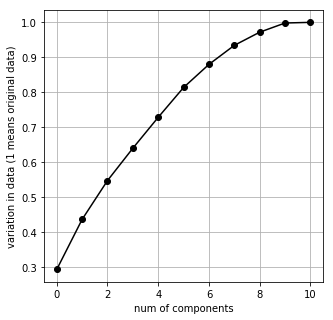

In [62]:
# perform principal component analysis (PCA) for feature dimension reduction
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scc)

# plot to find out how many principal components are best for model training
plt.figure(figsize = (5,5))
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ko-')
plt.xlabel('num of components')
plt.ylabel('variation in data (1 means original data)')

From the graph above, it is easy to see that using over 7 components can yield over 90% of the variation in the data. Hence, 7 components are considered in this work.

In [54]:
# Reduce the dimension of the data to 7 (use 7 components)
pca1 = PCA(n_components = 7)
X_pca1 = pca1.fit_transform(X_scc)

In [55]:
#split the data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca1, y, test_size = 0.25, random_state = 3)

## Machine learning model building

Different models are used here (kNN, Decision Tree, Random Forests, Gradient Boosted Decision Tree, SVM, Logistic Regression) to this dataset

This section aims to find the best parameter for each machine learning model for this red wine dataset

###                       1. kNN

Text(0, 0.5, 'accuracy')

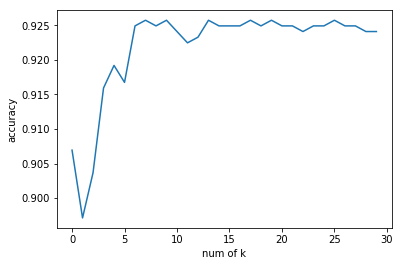

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

num = 30
acc_knn = []

for i in range(num):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(X_train, y_train)
    pred_knn = knn.predict(X_test)
    acc_knn.append(accuracy_score(y_test, pred_knn))

plt.figure
plt.plot(range(num), acc_knn)
plt.xlabel("num of k")
plt.ylabel("accuracy")

Looks like the accuracy reaches its saturation value (~0.925) after k > 7.

### 2. Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

#### a. lbfgs solver

Text(0.5, 1.0, 'lbfgs solver')

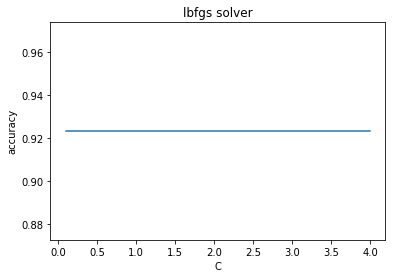

In [66]:
import numpy as np

num = np.linspace(0.1,4,50)
acc_log1 = []

for i in num:
    log1 = LogisticRegression(solver = 'lbfgs', penalty = 'l2', C = i)
    log1.fit(X_train, y_train)
    pred_log1 = log1.predict(X_test)
    acc_log1.append(accuracy_score(y_test, pred_log1))

plt.figure()
plt.plot(num, acc_log1)    
plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('lbfgs solver')

The accuracy is independent with the change of C (accuracy is always around 0.92)

#### b. sag solver

Text(0.5, 1.0, 'sag solver')

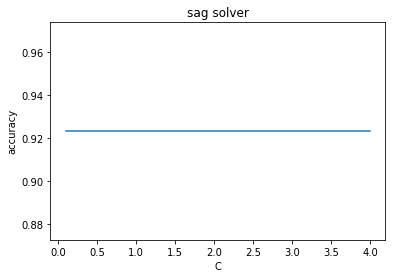

In [67]:
import numpy as np

num = np.linspace(0.1,4,50)
acc_log1 = []

for i in num:
    log1 = LogisticRegression(solver = 'sag', penalty = 'l2', C = i)
    log1.fit(X_train, y_train)
    pred_log1 = log1.predict(X_test)
    acc_log1.append(accuracy_score(y_test, pred_log1))

plt.figure()
plt.plot(num, acc_log1)    
plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('sag solver')

The accuracy is independent with the change of C (accuracy is always around 0.92)

#### c. saga solver

Text(0.5, 1.0, 'saga solver')

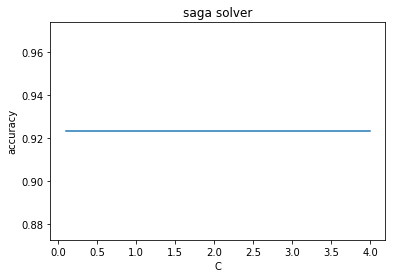

In [69]:
import numpy as np

num = np.linspace(0.1,4,50)
acc_log1 = []

for i in num:
    log1 = LogisticRegression(solver = 'saga', penalty = 'l2', C = i)
    log1.fit(X_train, y_train)
    pred_log1 = log1.predict(X_test)
    acc_log1.append(accuracy_score(y_test, pred_log1))

plt.figure()
plt.plot(num, acc_log1)    
plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('saga solver')

The accuracy is independent with the change of C (accuracy is always around 0.92)

#### d. newton-cg

Text(0.5, 1.0, 'newton-cg solver')

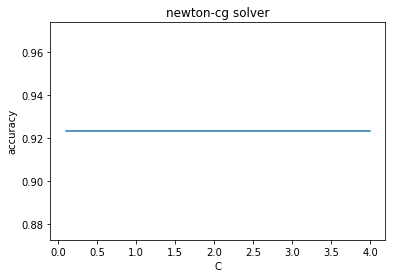

In [70]:
import numpy as np

num = np.linspace(0.1,4,50)
acc_log1 = []

for i in num:
    log1 = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = i)
    log1.fit(X_train, y_train)
    pred_log1 = log1.predict(X_test)
    acc_log1.append(accuracy_score(y_test, pred_log1))

plt.figure()
plt.plot(num, acc_log1)    
plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('newton-cg solver')

The accuracy is independent with the change of C (accuracy is always around 0.92)

Conclusively, for logistic regression, all different solvers (lbfgs, sag, saga and newton-cg) don't make much difference in model generalization.

### 3. Decision Tree

Text(0.5, 1.0, 'Decision tree')

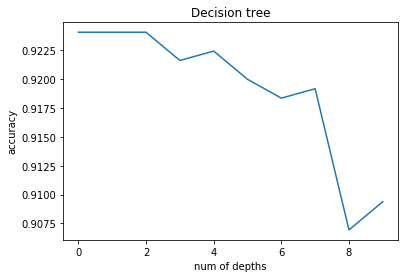

In [97]:
from sklearn.tree import DecisionTreeClassifier

num = range(10)
acc_dt = []

for i in num:
    dt = DecisionTreeClassifier(max_depth = i+1, random_state = 3, criterion = 'entropy')
    clf = dt.fit(X_train, y_train)
    pred_dt = dt.predict(X_test)
    acc_dt.append(accuracy_score(y_test, pred_dt))

plt.figure()
plt.plot(num, acc_dt)
plt.xlabel('num of depths')
plt.ylabel('accuracy')
plt.title('Decision tree')

It shows that the accuracy drops as the number of depths of the tree increase. The accuracy reaches its best at max_depth = 3.

### 4. Random Forests

Text(0.5, 1.0, 'Random Forests')

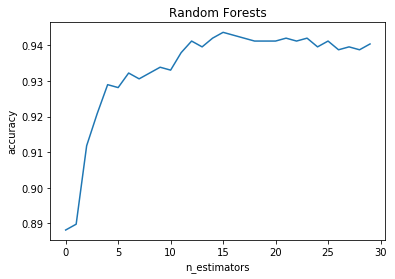

In [96]:
from sklearn.ensemble import RandomForestClassifier

num = range(30)
acc_rf = []

for i in num:
    rf = RandomForestClassifier(n_estimators = i+1, criterion = 'entropy', random_state = 3)
    rf.fit(X_train, y_train)
    pred_rf = rf.predict(X_test)
    acc_rf.append(accuracy_score(y_test, pred_rf))

plt.figure()
plt.plot(num, acc_rf)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('Random Forests')

It shows that when n_estimators = 15, the accuracy peaks to 0.94.

### 5. Gradient Boosted Decision Tree

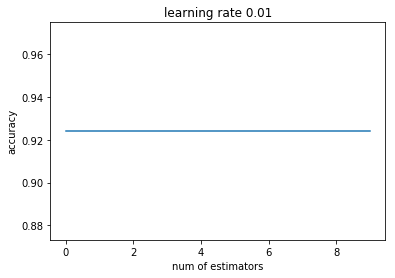

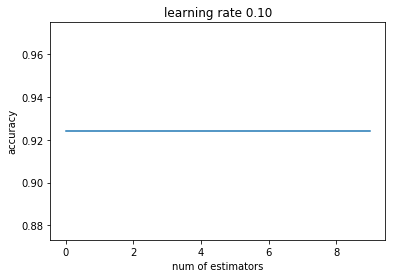

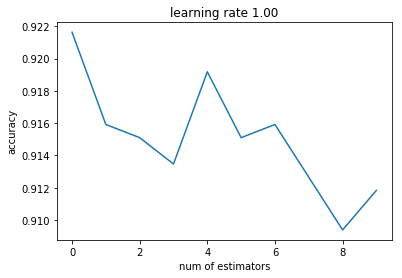

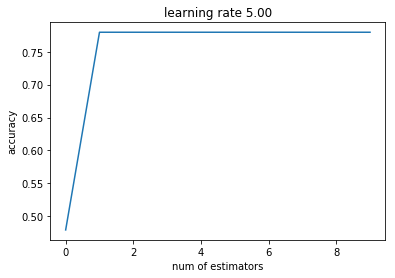

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

rate = [0.01, 0.1, 1, 5]
num = range(10)

for i in rate:
    acc_gbc = []
    for k in num:
        gbc = GradientBoostingClassifier(learning_rate = i, n_estimators = k+1, random_state = 3)
        gbc.fit(X_train, y_train)
        pred_gbc = gbc.predict(X_test)
        acc_gbc.append(accuracy_score(y_test, pred_gbc))
    
    plt.figure()
    plt.plot(num, acc_gbc)
    plt.xlabel('num of estimators')
    plt.ylabel('accuracy')
    plt.title('learning rate %.2f' %i)
        

From the results above, it is clear that using relatively small learning rate (< 0.1) is better for Gradient Boosting Decision Tree model

### 6 . SVM

In [106]:
from sklearn.svm import SVC

#### a. linear kernel

Text(0.5, 1.0, 'kernel: linear')

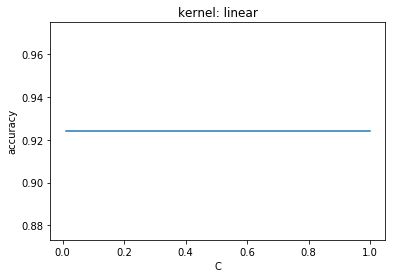

In [110]:
num = np.linspace(0.01,1,50)
acc_svm = []
for i in num:
    svm = SVC(kernel = 'linear', C = i)
    svm.fit(X_train, y_train)
    pred_svm = svm.predict(X_test)
    acc_svm.append(accuracy_score(y_test, pred_svm))

plt.figure()
plt.plot(num, acc_svm)
plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('kernel: linear')

SVM linear kernel model: the accuracy is independent on C and is always ~ 0.92.

#### b. rbf kernel

Text(0.5, 1.0, 'kernel: rbf')

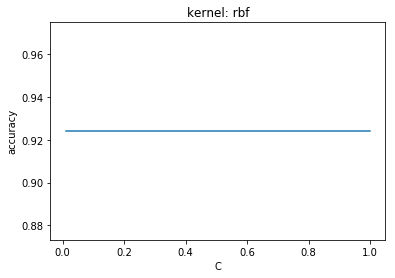

In [111]:
num = np.linspace(0.01,1,50)
acc_svm = []
for i in num:
    svm = SVC(kernel = 'rbf', C = i)
    svm.fit(X_train, y_train)
    pred_svm = svm.predict(X_test)
    acc_svm.append(accuracy_score(y_test, pred_svm))

plt.figure()
plt.plot(num, acc_svm)
plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('kernel: rbf')

SVM rbf kernel model: the accuracy is independent on C and is always ~ 0.92.

#### c. sigmoid

Text(0.5, 1.0, 'kernel: sigmoid')

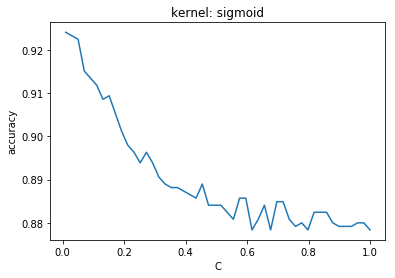

In [112]:
num = np.linspace(0.01,1,50)
acc_svm = []
for i in num:
    svm = SVC(kernel = 'sigmoid', C = i)
    svm.fit(X_train, y_train)
    pred_svm = svm.predict(X_test)
    acc_svm.append(accuracy_score(y_test, pred_svm))

plt.figure()
plt.plot(num, acc_svm)
plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('kernel: sigmoid')

SVM sigmoid kernel model: the accuracy decreases as C increases and accuracy reaches the peak (~0.92) when C = 0.

Conclusively, SVM (kernel: linear and rbf) are similar for model training result.

## Evaluation of different models using different metrics

### 1. Model training using optimal parameters found from previous section

In [149]:
#kNN
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
pred_knn_prb = knn.predict_proba(X_test)

#Logistic Regression
lgr = LogisticRegression(solver = 'lbfgs', penalty = 'l2', C = 2)
lgr.fit(X_train, y_train)
pred_lgr = lgr.predict(X_test)
pred_lgr_prb = lgr.predict_proba(X_test)
                         
#Decision Tree
dt = DecisionTreeClassifier(max_depth = 2, criterion = 'entropy', random_state = 3)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
#probability not suitable
                    
#Random Forest
rf = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 3)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
pred_rf_prb = rf.predict_proba(X_test)
                         
#Gradient Boosting Decision Tree 
gbc = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 4, random_state = 3)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)
pred_gbc_prb = gbc.predict_proba(X_test)
                         
#SVM
svm = SVC(kernel = 'rbf', C = 0.4, probability = True)
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)
pred_svm_prb = svm.predict_proba(X_test)


### 1 . Jaccard Score 

In [150]:
from sklearn.metrics import jaccard_similarity_score
j_acc_knn = jaccard_similarity_score(y_test, pred_knn)
j_acc_lgr = jaccard_similarity_score(y_test, pred_lgr)
j_acc_dt = jaccard_similarity_score(y_test, pred_dt)
j_acc_rf = jaccard_similarity_score(y_test, pred_rf)
j_acc_gbc = jaccard_similarity_score(y_test, pred_gbc)
j_acc_svm = jaccard_similarity_score(y_test, pred_svm)

acc = [j_acc_knn, j_acc_lgr, j_acc_dt, j_acc_rf, j_acc_gbc, j_acc_svm]
name = ["kNN", "Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosted Decision Tree", "SVM"]

for i, k in zip(acc, name):
    print("The jaccard accuracy for ", k, " is %.2f" %i)

The jaccard accuracy for  kNN  is 0.92
The jaccard accuracy for  Logistic Regression  is 0.92
The jaccard accuracy for  Decision Tree  is 0.92
The jaccard accuracy for  Random Forest  is 0.94
The jaccard accuracy for  Gradient Boosted Decision Tree  is 0.92
The jaccard accuracy for  SVM  is 0.92


### 2. F1 Score

In [151]:
from sklearn.metrics import f1_score
f1_acc_knn = f1_score(y_test, pred_knn, average = 'weighted')
f1_acc_lgr = f1_score(y_test, pred_lgr, average = 'weighted')
f1_acc_dt = f1_score(y_test, pred_dt, average = 'weighted')
f1_acc_rf = f1_score(y_test, pred_rf, average = 'weighted')
f1_acc_gbc = f1_score(y_test, pred_gbc, average = 'weighted')
f1_acc_svm = f1_score(y_test, pred_svm, average = 'weighted')

acc = [f1_acc_knn, f1_acc_lgr, f1_acc_dt, f1_acc_rf, f1_acc_gbc, f1_acc_svm]
name = ["kNN", "Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosted Decision Tree", "SVM"]

for i, k in zip(acc, name):
    print("The F1 score for ", k, " is %.2f" %i)

The F1 score for  kNN  is 0.90
The F1 score for  Logistic Regression  is 0.89
The F1 score for  Decision Tree  is 0.89
The F1 score for  Random Forest  is 0.93
The F1 score for  Gradient Boosted Decision Tree  is 0.89
The F1 score for  SVM  is 0.89


/Users/zhichaoweng/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 3. Log loss

In [155]:
from sklearn.metrics import log_loss
log_acc_knn = log_loss(y_test, pred_knn_prb)
log_acc_lgr = log_loss(y_test, pred_lgr_prb)
log_acc_rf = log_loss(y_test, pred_rf_prb)
log_acc_gbc = log_loss(y_test, pred_gbc_prb)
log_acc_svm = log_loss(y_test, pred_svm_prb)

acc = [log_acc_knn, log_acc_lgr, log_acc_rf, log_acc_gbc, log_acc_svm]
name = ["kNN", "Logistic Regression", "Random Forest", "Gradient Boosted Decision Tree", "SVM"]

for i, k in zip(acc, name):
    print("The log loss for ", k, " is %.2f" %i)

The log loss for  kNN  is 1.14
The log loss for  Logistic Regression  is 0.30
The log loss for  Random Forest  is 0.82
The log loss for  Gradient Boosted Decision Tree  is 0.47
The log loss for  SVM  is 0.27


## Metrics report

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| kNN                           | 0.92      | 0.90        | 1.14      |
| Logistic Regression           | 0.92       | 0.89        | 0.30      |
| Decision Tree                 | 0.92       | 0.89        | NaN     |
| Random Forest                 | 0.94       | 0.93        | 0.82       |
| Gradient Boosting Decision Tree | 0.92     | 0.89        | 0.47       |
| SVM                              | 0.92    | 0.89        | 0.27         |